# How Airbnb Can Boost Number of Bookings & Hosts in Boston

**About the data:**
This data was obtained from Kaggle, courtesy of Airbnb. It includes information on 68275 Airbnb customer reviews and 3585 listings, all in Boston.

**Project Outline:**

I. Data Cleansing
    
    A. Drop columns, merge datasets
    B. Create new dummies, fill in NAs

II. Overview of Listings and Hosts on Airbnb
    
    A. General trends of listing attributes and categories
    B. Airbnb listing locations
    C. How important is it to be a superhost?
    D. Number of new hosts over time
    E. Machine Learning: What are the most important factors for a listing's popularity (estimated using reviews_per_month)?

    
IV. Guests' Experiences with Airbnb
    
    A. Qualitative research: word clouds
    B. Distribution of reviews per guest
    C. Individual level guest behavior

V. Limitations & Conclusion



In [267]:
#import modules:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
import pandas as pd
import numpy as np
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

import sys
#reload(sys)
#sys.setdefaultencoding('utf8')

Populating the interactive namespace from numpy and matplotlib


In [1]:
#read in data:
listing = pd.read_csv("airbnb_listings.csv")
review = pd.read_csv("airbnb_reviews.csv")

NameError: name 'pd' is not defined

# Part I: Data Cleaning

**Overview of the dataframes and their variables:**

In [253]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
listing_id       68275 non-null int64
id               68275 non-null int64
date             68275 non-null object
reviewer_id      68275 non-null int64
reviewer_name    68275 non-null object
comments         68223 non-null object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [ ]:
listing.info()

**Dropping multiple columns from the listings dataframe**

The listings dataframe has too many columns so we'll drop some. Since we'll want to drop more columns than we're keeping, we can  create a new dataframe that pulls certain columns from the original. 

In [272]:
list2 = listing[["id", "name", "summary", "space", "interaction", "host_id", "host_since","host_total_listings_count","host_verifications",
"property_type",
"room_type",
"bathrooms",
"bedrooms",
"beds",
"bed_type",
"square_feet",
"price",
"weekly_price",
"monthly_price",
"security_deposit",
"city", "latitude", "longitude","neighbourhood_cleansed", "host_is_superhost",
"cleaning_fee",
"minimum_nights",
"maximum_nights",
"has_availability",
"number_of_reviews",
"review_scores_rating",
"instant_bookable", "reviews_per_month"]]

In [273]:
#Convert columns to dummies:

#Host_is_superhost dummy:
list2.loc[list2.host_is_superhost == 't', 'host_is_superhost'] = 1
list2.loc[list2.host_is_superhost == 'f', 'host_is_superhost'] = 0

#instant_bookable dummy:
list2.loc[list2.instant_bookable == 't', 'instant_bookable'] = 1
list2.loc[list2.instant_bookable == 'f', 'instant_bookable'] = 0

**Renaming column names**

Rename the listing df's column "id" to "listing_id" to make merging easier:

In [274]:
list2 = list2.rename(columns={'id': 'listing_id'})

#You can also rename multiple columns:
list2 = list2.rename(columns={'review_scores_rating': 'reviews_rating', '"has_availability"': 'available'})

In [275]:
#the cost-related columns have symbols such as $ in them. Need to clean them up:

list2['price'] = list2['price'].str.replace(',', '')
list2['price'] = list2['price'].str.replace('$', '')
list2['price'] = list2['price'].astype(float)

list2['security_deposit'] = list2['security_deposit'].str.replace(',', '')
list2['security_deposit'] = list2['security_deposit'].str.replace('$', '')
list2['security_deposit'] = list2['security_deposit'].astype(float)
        
list2['cleaning_fee'] = list2['cleaning_fee'].str.replace(',', '')
list2['cleaning_fee'] = list2['cleaning_fee'].str.replace('$', '')
list2['cleaning_fee'] = list2['cleaning_fee'].astype(float)

In [258]:
len(list2)

3585

In [259]:
list2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 33 columns):
listing_id                   3585 non-null int64
name                         3585 non-null object
summary                      3442 non-null object
space                        2528 non-null object
interaction                  2031 non-null object
host_id                      3585 non-null int64
host_since                   3585 non-null object
host_total_listings_count    3585 non-null int64
host_verifications           3585 non-null object
property_type                3582 non-null object
room_type                    3585 non-null object
bathrooms                    3571 non-null float64
bedrooms                     3575 non-null float64
beds                         3576 non-null float64
bed_type                     3585 non-null object
square_feet                  56 non-null float64
price                        3585 non-null float64
weekly_price                 892 non-null o

**Join review and listing tables together:**

In [285]:
dfm = review.merge(list2, left_on = "listing_id", right_on = "listing_id")

In [286]:
dfm.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments,name,summary,space,interaction,...,neighbourhood_cleansed,host_is_superhost,cleaning_fee,minimum_nights,maximum_nights,has_availability,number_of_reviews,reviews_rating,instant_bookable,reviews_per_month
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,Private Room Great Location Boston,NaN,Great Boston Location conveniently located nea...,NaN,...,East Boston,0,NaN,1,1125,NaN,215,86.0,0,5.35
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,Private Room Great Location Boston,NaN,Great Boston Location conveniently located nea...,NaN,...,East Boston,0,NaN,1,1125,NaN,215,86.0,0,5.35
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,Private Room Great Location Boston,NaN,Great Boston Location conveniently located nea...,NaN,...,East Boston,0,NaN,1,1125,NaN,215,86.0,0,5.35
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,Private Room Great Location Boston,NaN,Great Boston Location conveniently located nea...,NaN,...,East Boston,0,NaN,1,1125,NaN,215,86.0,0,5.35
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,Private Room Great Location Boston,NaN,Great Boston Location conveniently located nea...,NaN,...,East Boston,0,NaN,1,1125,NaN,215,86.0,0,5.35


**Dealing with missing values**

Fill in Nan values with the median of the column:

In [287]:
med = dfm['reviews_per_month'].median()
dfm['reviews_per_month'] = dfm['reviews_per_month'].fillna(med)

In [263]:
dfm.info()

#we can see that there are no longer null values in "reviews_per_month"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68275 entries, 0 to 68274
Data columns (total 38 columns):
listing_id                   68275 non-null int64
id                           68275 non-null int64
date                         68275 non-null object
reviewer_id                  68275 non-null int64
reviewer_name                68275 non-null object
comments                     68223 non-null object
name                         68275 non-null object
summary                      62064 non-null object
space                        60344 non-null object
interaction                  50799 non-null object
host_id                      68275 non-null int64
host_since                   68275 non-null object
host_total_listings_count    68275 non-null int64
host_verifications           68275 non-null object
property_type                68247 non-null object
room_type                    68275 non-null object
bathrooms                    67510 non-null float64
bedrooms                    

**Check if there all the values in "has_availability" column are null:**

In [278]:
dfm['has_availability'].unique()

#Yes, they are. We need to get rid of this

array([ nan])

**Drop all columns that contain only missing values:**

In [288]:
dfm = dfm.dropna(axis=1, how='all')

In [289]:
#drop more columns based on the .info() output above:

dfm.drop(["square_feet", "monthly_price", "weekly_price"], axis = 1, inplace = True)

**Convert several columns to numeric datatype:**

In [291]:
#clean the price column with commas, periods, and dollar signs before converting to numbers:

'''dfm['price'] = dfm['price'].str.replace(',', '')
dfm['price'] = dfm['price'].str.replace('$', '')
dfm['price'] = dfm['price'].astype(float)

dfm['security_deposit'] = dfm['security_deposit'].str.replace(',', '')
dfm['security_deposit'] = dfm['security_deposit'].str.replace('$', '')
dfm['security_deposit'] = dfm['security_deposit'].astype(float)
        
dfm['cleaning_fee'] = dfm['cleaning_fee'].str.replace(',', '')
dfm['cleaning_fee'] = dfm['cleaning_fee'].str.replace('$', '')
dfm['cleaning_fee'] = dfm['cleaning_fee'].astype(float)'''

"dfm['price'] = dfm['price'].str.replace(',', '')\ndfm['price'] = dfm['price'].str.replace('$', '')\ndfm['price'] = dfm['price'].astype(float)\n\ndfm['security_deposit'] = dfm['security_deposit'].str.replace(',', '')\ndfm['security_deposit'] = dfm['security_deposit'].str.replace('$', '')\ndfm['security_deposit'] = dfm['security_deposit'].astype(float)\n        \ndfm['cleaning_fee'] = dfm['cleaning_fee'].str.replace(',', '')\ndfm['cleaning_fee'] = dfm['cleaning_fee'].str.replace('$', '')\ndfm['cleaning_fee'] = dfm['cleaning_fee'].astype(float)"

In [292]:
#check columns:

dfm['price'].head(2)

#now the format is correct

0    95.0
1    95.0
Name: price, dtype: float64

# Part II: Overview of Listings & Hosts

Since all this data is from the Boston area, let's break it down by neighborhood.

In [293]:
#group by neighborhoods to see count and average price for each neighborhood

list2_l = list2[['listing_id', 'name', 'neighbourhood_cleansed', 'price', 'number_of_reviews']].groupby('neighbourhood_cleansed', as_index = False).agg({'listing_id': 'count', 'price': 'mean'})

In [294]:
#Which neighborhood has the most number of listings?

list2_l.sort_values(by = "listing_id", ascending = False).head(10)

,neighbourhood_cleansed,listing_id,price
12,Jamaica Plain,343,138.478134
22,South End,326,204.349693
1,Back Bay,302,240.950331
10,Fenway,290,220.393103
7,Dorchester,269,91.639405
0,Allston,260,112.307692
3,Beacon Hill,194,224.443299
4,Brighton,185,118.767568
20,South Boston,174,187.609195
8,Downtown,172,236.459302


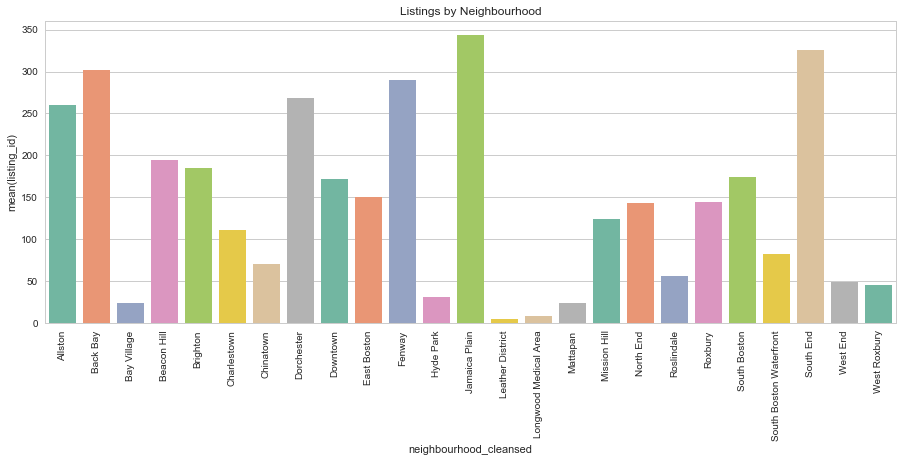

In [295]:
#Visualize the above:
sns.set(style = "whitegrid")
plt.figure(figsize=(15.24, 5.56))

b = sns.barplot(x = "neighbourhood_cleansed", y = "listing_id", data = list2_l, palette = "Set2")

labels = b.get_xticklabels()
b.set_xticklabels(labels, rotation=90)
b.set_title('Listings by Neighbourhood')

In [297]:
#Which neighborhood is the most expensive?

list2_l.sort_values(by = "price", ascending = False).head(10)

,neighbourhood_cleansed,listing_id,price
21,South Boston Waterfront,83,306.060241
2,Bay Village,24,266.833333
13,Leather District,5,253.600000
1,Back Bay,302,240.950331
8,Downtown,172,236.459302
6,Chinatown,71,232.352113
3,Beacon Hill,194,224.443299
10,Fenway,290,220.393103
23,West End,49,209.591837
22,South End,326,204.349693


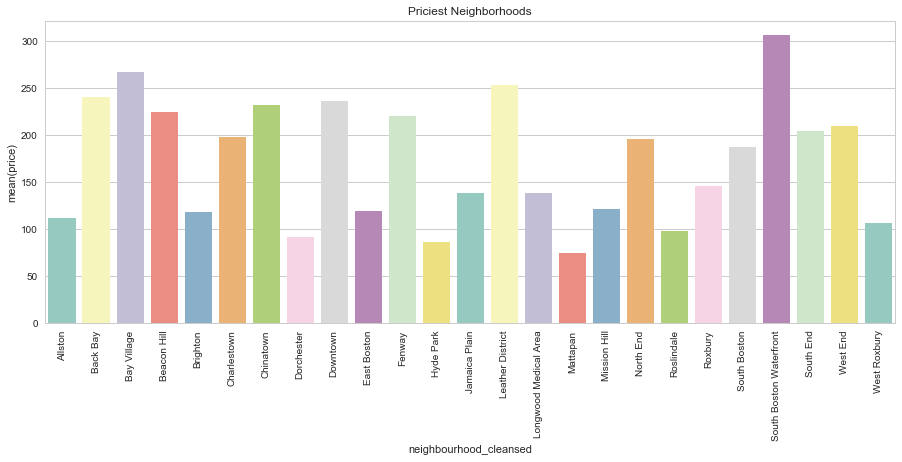

In [298]:
#Visualize the above:
sns.set(style = "whitegrid")
plt.figure(figsize=(15.24, 5.56))

b2 = sns.barplot(x = "neighbourhood_cleansed", y = "price", data = list2_l, palette = "Set3")

labels = b2.get_xticklabels()
b2.set_xticklabels(labels, rotation=90)
b2.set_title('Priciest Neighborhoods')

In [299]:
list2[["listing_id", "name", "neighbourhood_cleansed", "reviews_per_month"]].sort_values(by = "reviews_per_month", ascending = False).head(10)

,listing_id,name,neighbourhood_cleansed,reviews_per_month
1627,13393418,Spacious 1 bedroom in East Boston.,East Boston,19.15
1630,14072546,E3 Convenient to Logan Airport,East Boston,16.30
1546,13820571,Only 7 minutes to downtown Boston.,East Boston,15.54
1560,13908638,E1 Five mins from airport,East Boston,15.00
1543,8982616,#3 Real close to the airport...,East Boston,14.34
1613,11593592,Luxury Private Room with Organic Breakfast,East Boston,12.95
1586,13594886,Luxury Room Near Airport + City,East Boston,12.73
1642,14072256,E2 Steps from Maverick Sq,East Boston,12.16
335,13698137,One Private room @ Jamaica Plain,Jamaica Plain,12.13
1988,13306811,Beacon Hill Urban Oasis,Beacon Hill,11.68


We can use reviews per month as a proxy for the listing's popularity.  Most of the top 10 listings mention the airport in their name, suggesting that listings close to the airport are the most booked.

**Popularity of listings for superhosts vs. non-superhosts:**

In [300]:
list2[["listing_id", "host_is_superhost", "reviews_per_month", "price"]].groupby("host_is_superhost").agg({"price": "mean", "listing_id": "count", "reviews_per_month": "mean"})

,reviews_per_month,price,listing_id
host_is_superhost,,,
0,1.823018,173.604468,3178
1,2.884898,176.434889,407


In [301]:
#proportion of superhosts in the area:

float(407)/3178

0.12806796727501574

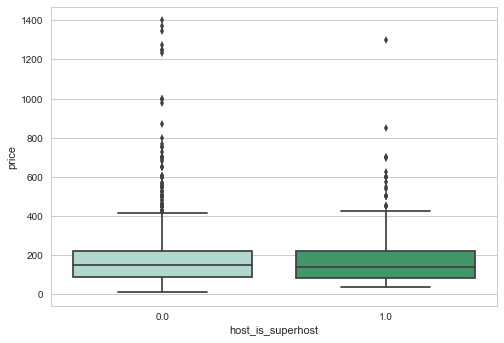

In [312]:
#create boxplots to visually compare superhosts vs. non-superhosts:
x = list2.price.astype(np.float)
y = list2.host_is_superhost.astype(np.float)

sns.boxplot(x = y, y = x, palette = "BuGn")

There are 2 big outliers in price. Get all the information on those 2 listings before deciding whether to drop them from the data:

In [303]:
list2[list2["price"] > 2500]

#Out of curiosity, let's look at each of their summaries:

list2[list2["price"] > 2500].iloc[0, 2]
list2[list2["price"] > 2500].iloc[1, 2]


,listing_id,name,summary,space,interaction,host_id,host_since,host_total_listings_count,host_verifications,property_type,...,neighbourhood_cleansed,host_is_superhost,cleaning_fee,minimum_nights,maximum_nights,has_availability,number_of_reviews,reviews_rating,instant_bookable,reviews_per_month
2285,12972378,Fenway Park/Kenmore Square Flat,"Central Heat/AC, cable/internet, electricity, ...","Practicality, functionality, location, comfort",NaN,71380118,2016-05-10,1,"['email', 'phone']",Apartment,...,Fenway,0,NaN,6,1125,NaN,0,NaN,0,NaN
3055,12679021,View of IndyCar...ON THE STREET!,"Look out the window, use the common space, wha...",NaN,NaN,38001139,2015-07-09,1,"['email', 'phone', 'facebook']",Apartment,...,South Boston Waterfront,0,NaN,1,1125,NaN,0,NaN,0,NaN


'Central Heat/AC, cable/internet, electricity, and hot water included. Fully furnished one bedroom apt. with sofa bed in living room. Kenmore Sq train/bus station less than a minute away   Located at 534 Commonwealth Ave. Nearby Eastern Standard bar and restaurant, Fenway Park, House of Blues, Boston University, Lansdowne st, Longwood Medical area Hospitals, etc. Very convenient during all seasons. Right in the middle of the city.'

'Look out the window, use the common space, whatever you would like to do for the IndyCar race in Boston on Septemb(PHONE NUMBER HIDDEN).  INCREDIBLE opportunity to see the cars literally go by 15 feet away.'

According to the two descriptions, these listings don't seem to be anything special, or representing any new trends/patterns. Let's remove them from the dataset:

In [304]:
list2.drop(2285, axis = 0, inplace = True)

list2.drop(3055, axis = 0, inplace = True)

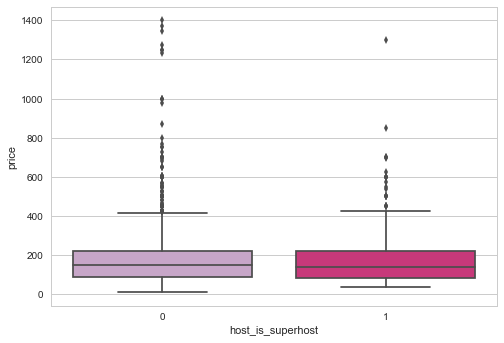

In [313]:
#now rerun the boxplot:

sns.boxplot(y = list2["price"], x = list2["host_is_superhost"], palette = "PuRd")


**Boxplot results:**

Now we can more accurately see that there's not much difference in price for superhosts vs. non-superhosts. However, as shown in the next boxplot, there is a noticeable difference in number of reviews per month, suggesting that superhosts are booked and reviewed more often.

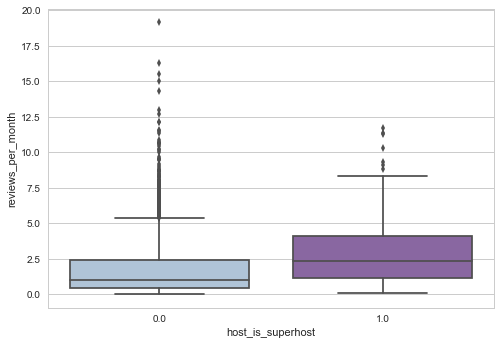

In [314]:
x = list2.reviews_per_month.astype(np.float)
y = list2.host_is_superhost.astype(np.float)

sns.boxplot(x = y, y = x, palette = "BuPu")

Both the average reviews per month and price are higher when the listing belongs to a superhost, so this does make a difference to customers. Also, only 13% of hosts in this dataset are currently superhosts, so there is opportunity for Airbnb to encourage more hosts to become superhosts. This will increase bookings in the area, benefiting both Airbnb and those new superhosts.

**It's important for both Airbnb and hosts to increase number of bookings. We can use this data to further investigate the other factors that may increase bookings, such as:**

-keywords in listing name

-room & property type

-cleaning fee

-review scores rating

-instant bookable

In [350]:
#Text analysis on listing names:

names = list2["name"]

names = list(names.get_values())

In [351]:
clean_names = []
for name in names:
    name = name.lower().split()
    for word in name:
        word = word.rstrip('*!?.:&-').lstrip('*@#&-')
        clean_names.append(word)
        

In [318]:
#remove all stop words from names:

stop = open("stop.txt", "r")
stop = stop.read().split()

#clean the word list:
lst = ["a", "i", "b", "the", "you", "not", "in", "be", "of", "on", "and", "1", "2", "3", "4", "5"]
for w in clean_names:
    if (w in stop) | (w in lst):
        clean_names.remove(w)


In [319]:
from collections import Counter

w = Counter(clean_names)
w.most_common(20)

[('boston', 625),
 ('room', 562),
 ('', 344),
 ('private', 337),
 ('bedroom', 318),
 ('end', 315),
 ('apartment', 295),
 ('apt', 290),
 ('near', 256),
 ('south', 236),
 ('cozy', 235),
 ('studio', 229),
 ('bay', 212),
 ('the', 198),
 ('2br', 186),
 ('hill', 170),
 ('1br', 167),
 ('spacious', 161),
 ('beacon', 161),
 ('fenway', 148)]

(-0.5, 399.5, 199.5, -0.5)

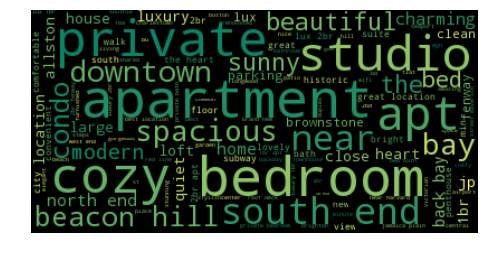

In [320]:
#Visualize the above with a word cloud:

from wordcloud import WordCloud

#convert names list to string:
clean_names = " ".join(clean_names)

wordcloud = WordCloud(max_font_size=50, colormap="summer", stopwords = ["Boston", "room", "br"], background_color = 'black').generate(clean_names)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Airbnb hosts can use a word cloud like this when choosing keywords to mention in their listing name. Interestingly, "airport" is not a top keyword, but in the previous table of top 10 most-reviewed listings, being close to the airport was mentioned in most of the titles.  Mentioning that the location is close to an important place in Boston, such as the airport or downtown area, may help boost bookings.

We can also tell that most listings in this dataset are studios or apartments, rather than single houses. Let's validate this finding with a graph since we have the 'property type' variable.

In [321]:
#Validate property type finding:

gbp = list2[["listing_id", "property_type"]].groupby("property_type", as_index = False).count().sort_values(by = "listing_id", ascending = False)
gbp

,property_type,listing_id
0,Apartment,2610
8,House,562
4,Condominium,231
11,Townhouse,54
1,Bed & Breakfast,41
9,Loft,39
10,Other,17
2,Boat,12
12,Villa,6
6,Entire Floor,4


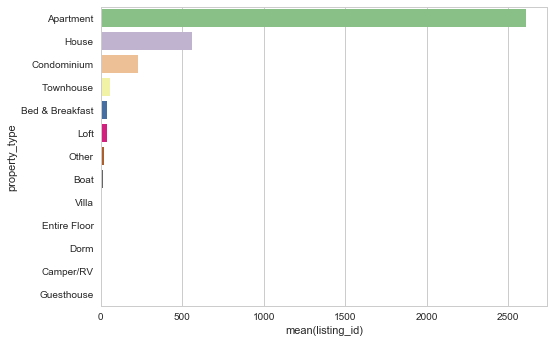

In [322]:
sns.barplot(x = "listing_id", y = "property_type", data = gbp, palette = "Accent")

**Conduct text analysis of listing summaries:**

In [352]:
space = list2["space"]

space = list(space.get_values())

In [353]:
#clean up text:
clean_space = []
for i in space:
    i = str(i)
    i = i.lower().split()
    for word in i:
        word = word.rstrip('*!?.:&-').lstrip('*@#&-')
        clean_space.append(word)
        

(-0.5, 399.5, 199.5, -0.5)

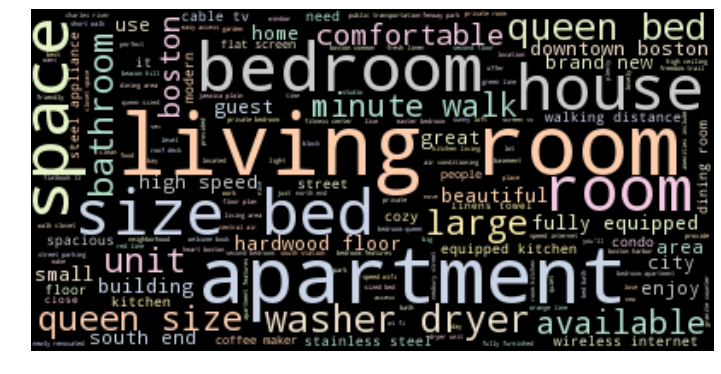

In [325]:
from wordcloud import WordCloud

#get list of stopwords:
stop = open("stop.txt", "r")
stop = stop.read().split()
stop.append("stay")
stop.append("nan")

#convert reviews list to string:
clean_space = " ".join(clean_space)

wordcloud = WordCloud(max_font_size=50, colormap="Pastel2", stopwords = stop, background_color = 'black').generate(clean_space)
plt.figure(figsize=(12.24, 9.56))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Now conduct text analysis of guest reviews and compare:**

In [354]:
reviews = dfm["comments"]

reviews = list(reviews.get_values())

In [355]:
clean_rev = []
for review in reviews:
    review = str(review)
    review = review.lower().split()
    for word in review:
        word = word.rstrip('*!?.:&-').lstrip('*@#&-')
        clean_rev.append(word)


(-0.5, 399.5, 199.5, -0.5)

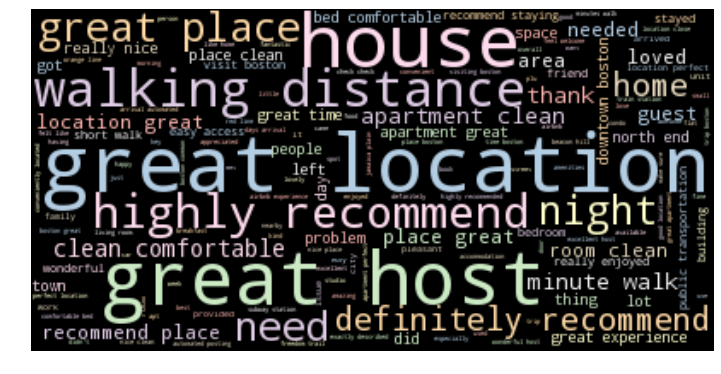

In [328]:
#Visualize top review mentions with a word cloud:

from wordcloud import WordCloud

#get list of stopwords:
stop = open("stop.txt", "r")
stop = stop.read().split()
stop.append("stay")

#convert reviews list to string:
clean_rev = " ".join(clean_rev)

wordcloud = WordCloud(max_font_size=50, colormap="Pastel1", stopwords = stop, background_color = 'black').generate(clean_rev)
plt.figure(figsize=(12.24, 9.56))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Comparison of listing summaries and guest reviews:**

The above was a really simplified marketing research exercise, but it still provided great insight.  Comparing the two word clouds (listing descriptions vs. guest reviews), we can see that there is a big gap between what guests actually want and what hosts *think* guests want. Many of the common words in each cloud do not match up.  For instance, "walking distance" jumps out in the guest reviews cloud, but is just a small mention in the listings cloud. 

**Rent Airbnb or stay in hotel?**

Is Boston a good area to stay at an Airbnb?  We want to see if there are enough listings that are both low in price and high in reviews per month, and also low in price and high in review score rating.

Use a density plot to visualize:

(0, 8)

(0, 1000)

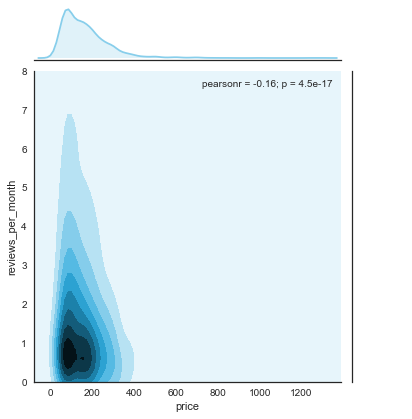

In [329]:
sns.set(style="white", color_codes=True)
sns.jointplot(x=list2["price"], y=list2["reviews_per_month"], kind='kde', color = "skyblue")

plt.ylim(0, 8)
plt.xlim(0,1000)


**Density Plot Results:**

As shown in the density plot above, as price increases, reviews per month decreases dramatically. This suggests that hosts should go for the "cozy & affordable" vibe rather than "pricey & luxurious" for their rental to increase bookings.

In the plot below, we see that the densest spot is the upper left corner, which is low price and high ratings. This suggests that Airbnbs in Boston are a great deal, because they are affordable and still exceed customers' expectations. If it were me, I'd go for an Airbnb rather than a hotel, although there are many other reasons why I love Airbnbs.

(60, 100)

(0, 800)

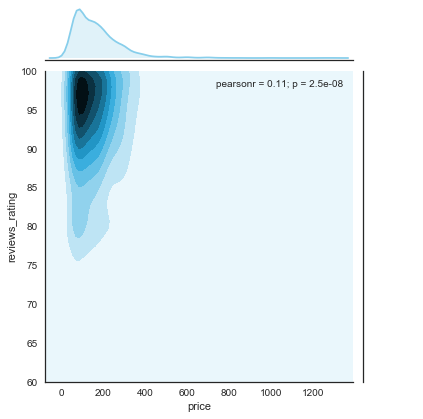

In [330]:
sns.set(style="white", color_codes=True)
sns.jointplot(x=list2["price"], y=list2["reviews_rating"], kind='kde', color="skyblue")

plt.ylim(60, 100)
plt.xlim(0,800)

In [331]:
corr = dfm.corr()

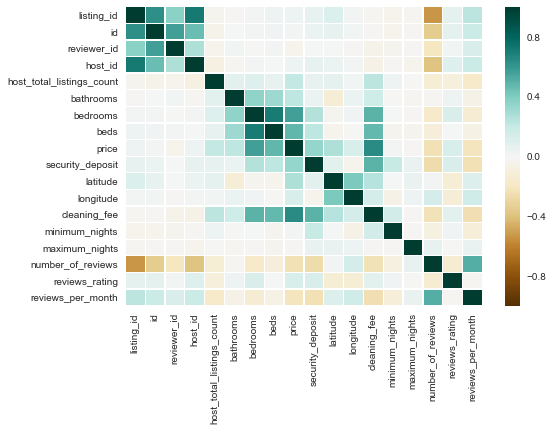

In [332]:
sns.heatmap(corr, annot = False, cmap = "BrBG", linewidths = 0.3)

Interesting findings from the correlation heatmap above:

1. security deposit & cleaning fee are positively correlated
2. cleaning fee & number of bathrooms and bedrooms are positively correlated

**Create a bubble plot to zoom in on a few of the quantitative variables in the correlation matrix**

(30, 100)

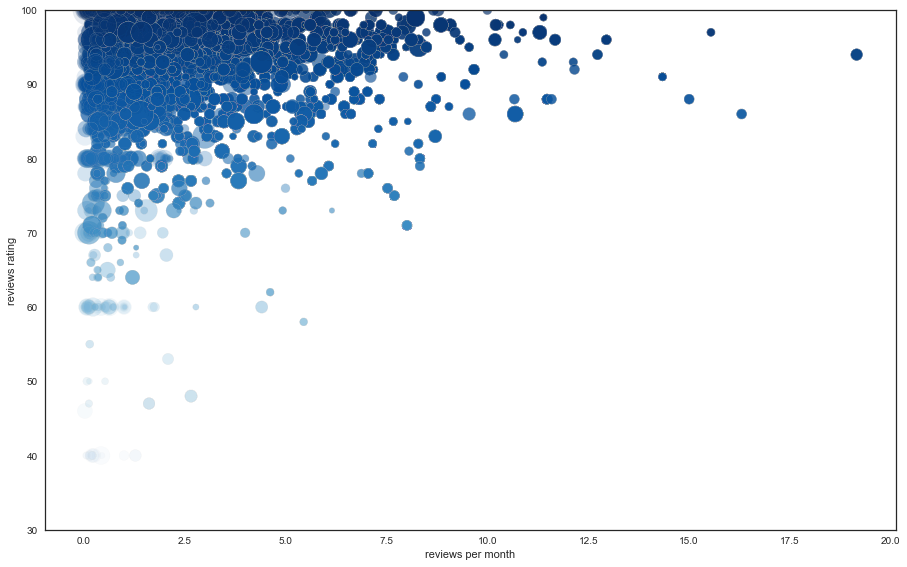

In [333]:
plt.figure(figsize=(15.24, 9.56))
plt.ylabel('reviews rating')
plt.xlabel('reviews per month')
plt.scatter(dfm["reviews_per_month"], dfm["reviews_rating"], s=dfm["price"], c = dfm["reviews_rating"], cmap ="Blues", edgecolors = "lightgray", alpha=0.1)
plt.ylim(30, 100)

plt.show()

The bubble plot shows that surprisingly, there isn't a big correlation between price and review rating, or price and reviews per month.  We can tell because the bubble sizes (based on price) are randomly spread out through the scatterplot. 

**Time series plot for number of new Airbnb hosts over time:**

In [334]:
gb_date = list2[["host_id", "host_since"]].groupby("host_since", as_index = False).count()

gb_date.sort_values(by = "host_since", ascending = True).head(5)

,host_since,host_id
0,2008-11-11,2
1,2008-12-03,1
2,2009-02-16,1
3,2009-02-17,1
4,2009-02-19,6


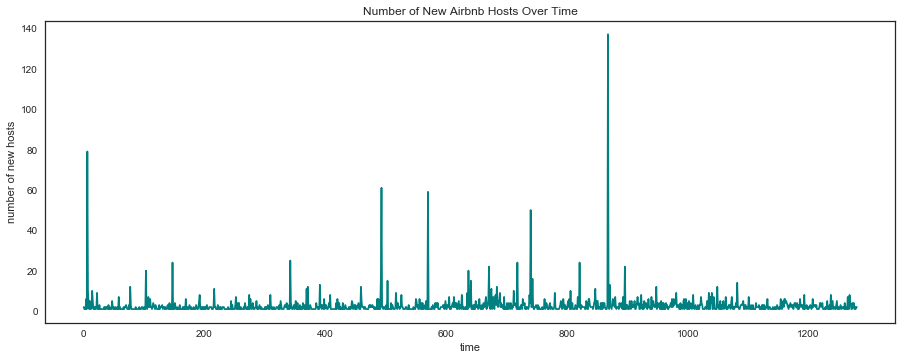

In [335]:
#number of new hosts over time:
plt.figure(figsize=(15.24, 5.56))
plt.ylabel('number of new hosts')
plt.xlabel('time')
plt.title("Number of New Airbnb Hosts Over Time")
plt.plot(gb_date["host_id"], color='teal')
plt.show()

Throughout the time period of this dataset, there are a few spikes but generally no upward trend in number of hosts on Airbnb.  This suggests that Airbnb should invest more effort in recruiting Airnb hosts in order to increase overall number of bookings.

### Machine Learning Application: Using Decision Tree to Predict Listing's Popularity

In [336]:
#import modules

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [337]:
#Get rid of all missing values:

# Fill in w/ median value
med1 = list2['reviews_per_month'].median()
list2['reviews_per_month'] = list2['reviews_per_month'].replace('NaN', med1)
list2['reviews_per_month'] = list2['reviews_per_month'].replace(list2.reviews_per_month.filter(regex='nan'), med1)
list2['reviews_per_month'].unique()

med2 = list2['reviews_rating'].median()
list2['reviews_rating'] = list2['reviews_rating'].replace('NaN', med2)
list2['reviews_rating'] = list2['reviews_rating'].replace(list2.reviews_rating.filter(regex='nan'), med2)
list2['reviews_rating'].unique()

med3 = list2['instant_bookable'].median()
list2['instant_bookable'] = list2['instant_bookable'].replace('NaN', med3)
list2['instant_bookable'] = list2['instant_bookable'].replace(list2.instant_bookable.filter(regex='nan'), med3)
list2['instant_bookable'].unique()


med4 = list2['host_is_superhost'].median()
list2['host_is_superhost'] = list2['host_is_superhost'].replace('NaN', med4)
list2['host_is_superhost'] = list2['host_is_superhost'].replace(list2.host_is_superhost.filter(regex='nan'), med4)
list2['host_is_superhost'].fillna(med4)
list2['host_is_superhost'].unique()


med5 = list2['cleaning_fee'].median()
list2['cleaning_fee'] = list2['cleaning_fee'].replace('NaN', med5)
list2['cleaning_fee'] = list2['cleaning_fee'].replace(list2.cleaning_fee.filter(regex='nan'), med5)
list2['cleaning_fee'].fillna(med5)
list2['cleaning_fee'].unique()

med6 = list2['security_deposit'].median()
list2['security_deposit'] = list2['security_deposit'].replace('NaN', med6)
list2['security_deposit'] = list2['security_deposit'].replace(list2.security_deposit.filter(regex='nan'), med6)
list2['security_deposit'].fillna(med6)
list2['security_deposit'].unique()

med7 = list2['minimum_nights'].median()
list2['minimum_nights'] = list2['minimum_nights'].replace('NaN', med7)
list2['minimum_nights'] = list2['minimum_nights'].replace(list2.minimum_nights.filter(regex='nan'), med7)
list2['minimum_nights'].unique()


array([             nan,   1.30000000e+00,   4.70000000e-01,
         1.00000000e+00,   2.25000000e+00,   1.70000000e+00,
         4.00000000e+00,   2.38000000e+00,   5.36000000e+00,
         1.01000000e+00,   3.60000000e-01,   4.80000000e-01,
         6.40000000e-01,   4.93000000e+00,   5.60000000e-01,
         1.16000000e+00,   3.70000000e-01,   2.90000000e-01,
         1.24000000e+00,   5.93000000e+00,   6.30000000e-01,
         1.58000000e+00,   7.00000000e-02,   1.13000000e+00,
         1.06000000e+00,   4.02000000e+00,   2.10000000e-01,
         5.80000000e-01,   1.93000000e+00,   3.80000000e-01,
         7.20000000e-01,   5.90000000e-01,   2.36000000e+00,
         2.07000000e+00,   4.32000000e+00,   8.70000000e-01,
         5.77000000e+00,   4.39000000e+00,   5.40000000e-01,
         7.40000000e-01,   3.13000000e+00,   1.67000000e+00,
         1.23000000e+00,   3.30000000e-01,   3.22000000e+00,
         1.20000000e-01,   1.15000000e+00,   4.60000000e-01,
         6.00000000e-02,

array([  nan,   94.,   98.,  100.,   99.,   90.,   96.,   80.,   97.,
         91.,   95.,   88.,   92.,   87.,   93.,   73.,   82.,   20.,
         89.,   81.,   78.,   74.,   60.,   86.,   85.,   75.,   79.,
         70.,   83.,   64.,   84.,   40.,   68.,   67.,   48.,   58.,
         62.,   76.,   77.,   71.,   65.,   53.,   47.,   72.,   46.,
         50.,   66.,   69.,   55.])

array([0, 1], dtype=int64)

0       0
1       0
2       1
3       0
4       1
5       1
6       0
7       1
8       1
9       1
10      0
11      1
12      0
13      0
14      0
15      0
16      0
17      0
18      1
19      1
20      1
21      0
22      0
23      0
24      0
25      1
26      0
27      1
28      0
29      1
       ..
3555    0
3556    0
3557    0
3558    0
3559    0
3560    0
3561    0
3562    0
3563    0
3564    0
3565    0
3566    0
3567    0
3568    0
3569    0
3570    0
3571    0
3572    0
3573    0
3574    0
3575    0
3576    0
3577    0
3578    0
3579    0
3580    0
3581    0
3582    0
3583    0
3584    0
Name: host_is_superhost, Length: 3583, dtype: int64

array([0, 1], dtype=int64)

0        35.0
1        10.0
2        50.0
3        50.0
4        15.0
5        30.0
6        50.0
7        10.0
8        50.0
9        50.0
10       30.0
11       40.0
12       40.0
13       50.0
14      150.0
15       50.0
16       50.0
17       20.0
18       50.0
19       50.0
20       50.0
21       50.0
22       50.0
23      100.0
24      100.0
25       10.0
26       50.0
27       15.0
28       50.0
29       40.0
        ...  
3555     20.0
3556     50.0
3557     20.0
3558    130.0
3559    100.0
3560     80.0
3561     50.0
3562     50.0
3563     50.0
3564     50.0
3565     50.0
3566     50.0
3567     95.0
3568     50.0
3569     50.0
3570     20.0
3571     50.0
3572     95.0
3573     25.0
3574     50.0
3575     50.0
3576     85.0
3577     50.0
3578     50.0
3579     10.0
3580     50.0
3581     15.0
3582     50.0
3583     50.0
3584     25.0
Name: cleaning_fee, Length: 3583, dtype: float64

array([  35.,   10.,   nan,   50.,   15.,   30.,   40.,  150.,   20.,
        100.,   85.,   25.,   56.,   45.,  125.,   80.,    5.,  120.,
         18.,   90.,  200.,  140.,   95.,   60.,   75.,    7.,   64.,
         12.,  135.,  250.,   70.,    9.,    8.,   55.,  175.,   65.,
         69.,  130.,    6.,   84.,   13.,   29.,  160.,   49.,  119.,
        197.,  155.,  158.,  166.,  199.,   99.,  225.,   39.,   54.,
         24.,  110.,  136.,  115.,   83.,   42.,  139.,   79.,   37.,
         28.,   82.,   19.,   57.,   72.,   58.,   66.,  180.,  300.,
         14.,  129.,  105.,  149.,   52.,   34.,   59.,  230.])

0       250.0
1        95.0
2       250.0
3       100.0
4       250.0
5       250.0
6       250.0
7       250.0
8       250.0
9       200.0
10      250.0
11      250.0
12      250.0
13      250.0
14      500.0
15      250.0
16      250.0
17      250.0
18      250.0
19      250.0
20      250.0
21      150.0
22      250.0
23      150.0
24      500.0
25      250.0
26      250.0
27      250.0
28      250.0
29      250.0
        ...  
3555    100.0
3556    250.0
3557    250.0
3558    200.0
3559    500.0
3560    100.0
3561    250.0
3562    250.0
3563    200.0
3564     95.0
3565    250.0
3566    250.0
3567    400.0
3568     95.0
3569    250.0
3570    100.0
3571    250.0
3572    400.0
3573    250.0
3574    950.0
3575     95.0
3576    200.0
3577    250.0
3578    250.0
3579    250.0
3580     95.0
3581    100.0
3582    250.0
3583    100.0
3584    250.0
Name: security_deposit, Length: 3583, dtype: float64

array([   nan,    95.,   100.,   200.,   500.,   150.,   250.,   446.,
         223.,   300.,   400.,   800.,   298.,   450.,   650.,  2000.,
         240.,  1000.,   350.,  1500.,  4500.,   600.,   301.,  2500.,
          99.,   275.,   375.,   199.,  1200.,   180.,   220.,   160.,
         299.,   750.,   325.,  1250.,   125.,   900.,   475.,  4000.,
         185.,  3000.,   330.,   147.,   425.,   399.,   120.,   307.,
        1900.,   950.,   175.,   179.,   128.,   700.,   118.])

array([  2,   3,   1,   4,   5,  14, 300,   7,   6,  30,  28,  21,  10,
        20,  15,  32,  27,  60,  90,  13,   8, 200,   9,  25,  11,  23,
        18,  17, 273], dtype=int64)

In [338]:
#Check all columns needed for ML:
print "price"
list2.price.unique()
print "superhost"
list2.host_is_superhost.unique()
print "reviews_rating"
list2.reviews_rating.unique()
print "reviews_per_month"
list2.reviews_per_month.unique()
print "instant_bookable"
list2.instant_bookable.unique()
print "cleaning_fee"
list2.cleaning_fee.unique()
print "security_deposit"
list2.security_deposit.unique()
print "minimum_nights"
list2.minimum_nights.unique()

list3 = list2.dropna(subset = ['reviews_rating', "reviews_per_month", "cleaning_fee"])

price


array([  250.,    65.,    75.,    79.,   100.,    58.,   229.,    60.,
          57.,    93.,   150.,   145.,   165.,    49.,    40.,   120.,
          70.,   175.,    95.,    90.,    67.,    55.,   200.,   110.,
         115.,   125.,    78.,    50.,    45.,    85.,    89.,   285.,
         140.,    80.,    63.,    46.,    62.,    69.,    73.,    61.,
          27.,   190.,   149.,   168.,   205.,   117.,   429.,   267.,
          87.,   300.,   119.,   195.,   210.,   500.,   130.,   450.,
         399.,   350.,    99.,   295.,   107.,    76.,    59.,    88.,
         164.,   185.,   105.,   319.,    53.,   199.,   114.,   180.,
          92.,    84.,   275.,   230.,   192.,   170.,   240.,   225.,
         178.,   109.,   383.,   184.,   299.,   155.,   135.,    29.,
          68.,   136.,   189.,    72.,    22.,    82.,   160.,    94.,
          83.,   750.,    77.,    71.,   220.,    54.,   480.,   550.,
         325.,   290.,   159.,    56.,   235.,    86.,   255.,    91.,
      

superhost


array([0, 1], dtype=int64)

reviews_rating


array([  nan,   94.,   98.,  100.,   99.,   90.,   96.,   80.,   97.,
         91.,   95.,   88.,   92.,   87.,   93.,   73.,   82.,   20.,
         89.,   81.,   78.,   74.,   60.,   86.,   85.,   75.,   79.,
         70.,   83.,   64.,   84.,   40.,   68.,   67.,   48.,   58.,
         62.,   76.,   77.,   71.,   65.,   53.,   47.,   72.,   46.,
         50.,   66.,   69.,   55.])

reviews_per_month


array([             nan,   1.30000000e+00,   4.70000000e-01,
         1.00000000e+00,   2.25000000e+00,   1.70000000e+00,
         4.00000000e+00,   2.38000000e+00,   5.36000000e+00,
         1.01000000e+00,   3.60000000e-01,   4.80000000e-01,
         6.40000000e-01,   4.93000000e+00,   5.60000000e-01,
         1.16000000e+00,   3.70000000e-01,   2.90000000e-01,
         1.24000000e+00,   5.93000000e+00,   6.30000000e-01,
         1.58000000e+00,   7.00000000e-02,   1.13000000e+00,
         1.06000000e+00,   4.02000000e+00,   2.10000000e-01,
         5.80000000e-01,   1.93000000e+00,   3.80000000e-01,
         7.20000000e-01,   5.90000000e-01,   2.36000000e+00,
         2.07000000e+00,   4.32000000e+00,   8.70000000e-01,
         5.77000000e+00,   4.39000000e+00,   5.40000000e-01,
         7.40000000e-01,   3.13000000e+00,   1.67000000e+00,
         1.23000000e+00,   3.30000000e-01,   3.22000000e+00,
         1.20000000e-01,   1.15000000e+00,   4.60000000e-01,
         6.00000000e-02,

instant_bookable


array([0, 1], dtype=int64)

cleaning_fee


array([  35.,   10.,   nan,   50.,   15.,   30.,   40.,  150.,   20.,
        100.,   85.,   25.,   56.,   45.,  125.,   80.,    5.,  120.,
         18.,   90.,  200.,  140.,   95.,   60.,   75.,    7.,   64.,
         12.,  135.,  250.,   70.,    9.,    8.,   55.,  175.,   65.,
         69.,  130.,    6.,   84.,   13.,   29.,  160.,   49.,  119.,
        197.,  155.,  158.,  166.,  199.,   99.,  225.,   39.,   54.,
         24.,  110.,  136.,  115.,   83.,   42.,  139.,   79.,   37.,
         28.,   82.,   19.,   57.,   72.,   58.,   66.,  180.,  300.,
         14.,  129.,  105.,  149.,   52.,   34.,   59.,  230.])

security_deposit


array([   nan,    95.,   100.,   200.,   500.,   150.,   250.,   446.,
         223.,   300.,   400.,   800.,   298.,   450.,   650.,  2000.,
         240.,  1000.,   350.,  1500.,  4500.,   600.,   301.,  2500.,
          99.,   275.,   375.,   199.,  1200.,   180.,   220.,   160.,
         299.,   750.,   325.,  1250.,   125.,   900.,   475.,  4000.,
         185.,  3000.,   330.,   147.,   425.,   399.,   120.,   307.,
        1900.,   950.,   175.,   179.,   128.,   700.,   118.])

minimum_nights


array([  2,   3,   1,   4,   5,  14, 300,   7,   6,  30,  28,  21,  10,
        20,  15,  32,  27,  60,  90,  13,   8, 200,   9,  25,  11,  23,
        18,  17, 273], dtype=int64)

In [339]:
#create a dummy column for Y (reviews per month):

#get median:
list3["reviews_per_month"].median()

list3.loc[list3.reviews_per_month >= 2, 'rpm_dum'] = 1
list3.loc[list3.reviews_per_month < 2, 'rpm_dum'] = 0

1.3

In [340]:
#create dataframe specifically for the decision tree (because we don't need to 
#include a lot of the columns as X variables, we can only use columns with numeric values):


#Make X & Y
X = list3[["price", "host_is_superhost", "cleaning_fee", "reviews_rating", "minimum_nights"]]
Y =list3.rpm_dum

dt = tree.DecisionTreeClassifier(max_depth=3)

dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Explanation of variable selection:**

-Predictors: reviews_rating, price, cleaning_fee, superhost, security deposit.  Price is important, and so is the superhost option, which was analyzed earlier. I also included cleaning fee and review rating because they are important factors that many Airbnb guests use to select a place to stay. 

-Y-variable: reviews per month (as an estimation for popularity). Selected this rather than *number of reviews* because the latter does not account for the time factor; it just sums up all reviews over time. Using a per-unit-time variable allows us to avoid that issue.

Side note: I usually set the depth to 2 or 3 (depending on number of predictors) to avoid overfitting.

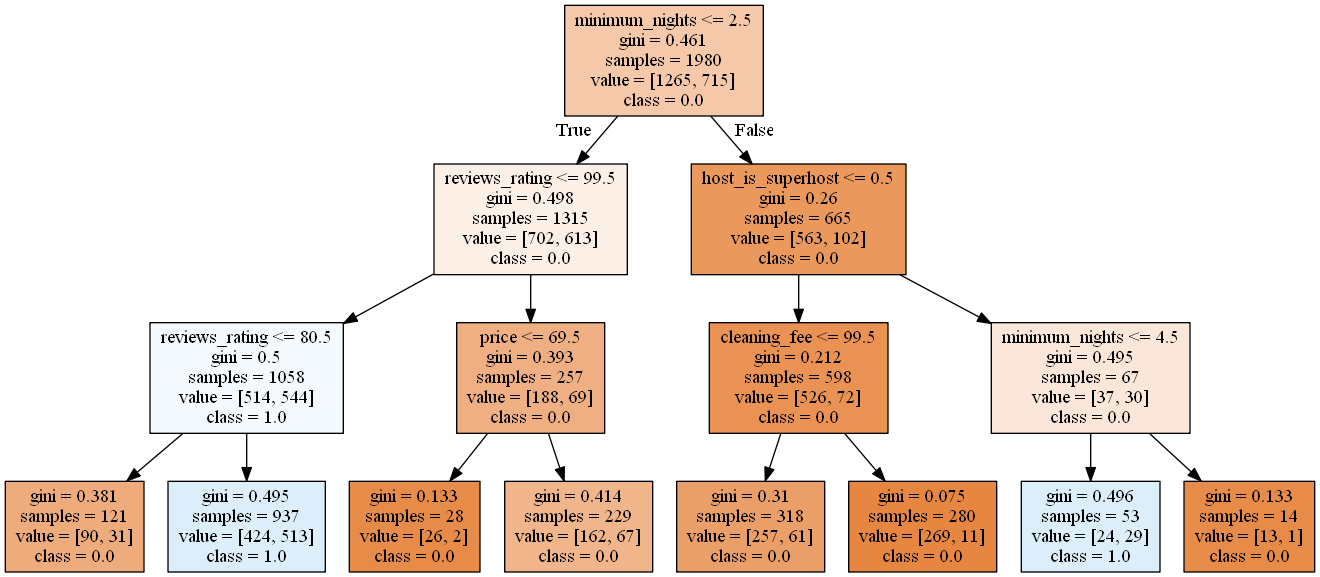

In [341]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names, filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

**Decision Tree Results:**

The tree shows that the minimum nights per stay is the most important factor in determining whether a listing gets high or low number of reviews per month. This is not surprising because each guest can only review the place once per stay, so the average length of stay for a listing should be negatively correlated with its reviews per month.

We also see that the review rating and whether the host is a superhost are important factors for whether a listing gets high or low number of reviews. In addition, if the host is not a superhost, then the cleaning fee is an important factor.

**Recommendations:**

-For non-superhosts, set a reasonably low cleaning fee to attract more guests.

-For Airbnb, help more hosts become superhosts by sending helpful advice on increasing bookings and incentivizing guests to write reviews, which will boost reviews:bookings ratios.

# Part III: Overview of Reviews and Airbnb Guests

Now we need the merged df, which combined the listings and reviews together.

In [ ]:
dfm.info()

In [342]:
#How many different Airbnb users have posted reviews in the Boston area?

len(dfm["reviewer_id"].unique())

63789

In [343]:
#get a distributions of reviews per listing

gbr = dfm[["listing_id", "comments"]].groupby("listing_id", as_index = False).count().sort_values(by = "comments", ascending = False)

gbr.head(5)

,listing_id,comments
60,66288,402
315,1497879,320
126,414419,312
39,31796,290
189,815639,281


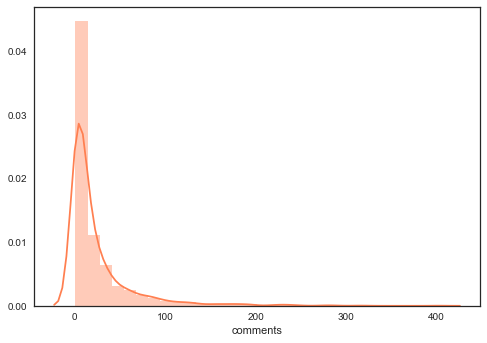

In [344]:
sns.distplot(gbr["comments"], bins = 30, color = "coral")

The histogram is very right-skewed, which suggests that either most Airbnb hosts in this area struggle to get bookings and/or customer reviews, or most customers will not review a listing they've stayed at. We could determine which of these situations, if either, is true if we had data on customer stays. Then we could compare customer stays to customer reviews.

In [345]:
#tracking number of reviews over time for the most popular listing:

dfm_date = dfm[dfm["listing_id"] == 66288][["id", "date"]].groupby("date", as_index = False).count()

dfm_date.head(3)
dfm_date.tail(3)

#this Airbnb listing has been around for a while

,date,id
0,2011-01-15,1
1,2011-01-25,1
2,2011-03-01,1


,date,id
400,2016-08-03,1
401,2016-08-16,1
402,2016-08-20,1


In [346]:
#Most active reviewers/Airbnb guests:
#NOTE: id refers to review id

dfm[["id", "reviewer_id"]].groupby("reviewer_id", as_index = False).count().nlargest(10, "id")

,reviewer_id,id
19374,12096536,37
46582,40651868,25
50316,46024609,22
53382,52667131,21
26655,18607361,18
45754,39441871,18
38720,30824856,16
18515,11338714,15
29438,21142093,13
56878,61663856,13


Let's stalk the top reviewer, see the different Airbnbs they've stayed at, and determine if they have any particular preferences for their stays.

In [347]:
dfm[dfm["reviewer_id"] == 12096536]

,listing_id,id,date,reviewer_id,reviewer_name,comments,name,summary,space,interaction,...,longitude,neighbourhood_cleansed,host_is_superhost,cleaning_fee,minimum_nights,maximum_nights,number_of_reviews,reviews_rating,instant_bookable,reviews_per_month
1254,1321422,25937557,2015-01-30,12096536,Marie,My second stay with the Carney's.\r\nIt was a ...,Barney's Master Bedroom T Downtown,Spacious room with a queen size bed and an ott...,We live in an 18 room 160 year old house that ...,"We interact with guests when we are around, wh...",...,-71.046943,Dorchester,1,25.0,1,300,194,96.0,1,5.07
1257,1321422,26476071,2015-02-13,12096536,Marie,This was my third time staying with the Carney...,Barney's Master Bedroom T Downtown,Spacious room with a queen size bed and an ott...,We live in an 18 room 160 year old house that ...,"We interact with guests when we are around, wh...",...,-71.046943,Dorchester,1,25.0,1,300,194,96.0,1,5.07
1262,1321422,28588504,2015-03-26,12096536,Marie,I have stayed with the Carney's many times. I ...,Barney's Master Bedroom T Downtown,Spacious room with a queen size bed and an ott...,We live in an 18 room 160 year old house that ...,"We interact with guests when we are around, wh...",...,-71.046943,Dorchester,1,25.0,1,300,194,96.0,1,5.07
1281,1321422,32800467,2015-05-21,12096536,Marie,This time I enjoyed live music playing in the ...,Barney's Master Bedroom T Downtown,Spacious room with a queen size bed and an ott...,We live in an 18 room 160 year old house that ...,"We interact with guests when we are around, wh...",...,-71.046943,Dorchester,1,25.0,1,300,194,96.0,1,5.07
1345,1321422,59800611,2016-01-15,12096536,Marie,I am a frequent guest at the Carney's. Always ...,Barney's Master Bedroom T Downtown,Spacious room with a queen size bed and an ott...,We live in an 18 room 160 year old house that ...,"We interact with guests when we are around, wh...",...,-71.046943,Dorchester,1,25.0,1,300,194,96.0,1,5.07
1347,1321422,60791502,2016-01-27,12096536,Marie,"As always, a pleasure",Barney's Master Bedroom T Downtown,Spacious room with a queen size bed and an ott...,We live in an 18 room 160 year old house that ...,"We interact with guests when we are around, wh...",...,-71.046943,Dorchester,1,25.0,1,300,194,96.0,1,5.07
1348,1321422,60896767,2016-01-29,12096536,Marie,Favorite spot,Barney's Master Bedroom T Downtown,Spacious room with a queen size bed and an ott...,We live in an 18 room 160 year old house that ...,"We interact with guests when we are around, wh...",...,-71.046943,Dorchester,1,25.0,1,300,194,96.0,1,5.07
1352,1321422,62110197,2016-02-11,12096536,Marie,Always my go to..,Barney's Master Bedroom T Downtown,Spacious room with a queen size bed and an ott...,We live in an 18 room 160 year old house that ...,"We interact with guests when we are around, wh...",...,-71.046943,Dorchester,1,25.0,1,300,194,96.0,1,5.07
1353,1321422,62224417,2016-02-12,12096536,Marie,I stay at the Carney's on a weekly basis becau...,Barney's Master Bedroom T Downtown,Spacious room with a queen size bed and an ott...,We live in an 18 room 160 year old house that ...,"We interact with guests when we are around, wh...",...,-71.046943,Dorchester,1,25.0,1,300,194,96.0,1,5.07
1365,1321422,69756204,2016-04-13,12096536,Marie,"I am a ""frequent flyer"" at the Carney's. The b...",Barney's Master Bedroom T Downtown,Spacious room with a queen size bed and an ott...,We live in an 18 room 160 year old house that ...,"We interact with guests when we are around, wh...",...,-71.046943,Dorchester,1,25.0,1,300,194,96.0,1,5.07


In [348]:
dfm[dfm["reviewer_id"] == 12096536].groupby("host_id")["id"].count()

host_id
6608084    36
7799789     1
Name: id, dtype: int64

This finding is really interesting.  The output above shows that this individual has stayed at the same few Airbnbs many times.  She also stayed only with superhosts and at instant-bookable places. This guest shows high customer loyalty to the places she has stayed at.

**While these results are only for one particular customer, a similar approach applied to more customers can help Airbnb with both segmentation and targeted marketing.**

Next, determine if the above is an example of typical Airbnb guest behavior.  We can look at other reviewers to check.

In [349]:
#take random reviewers from the top 10:
print "reviewer A"
dfm[dfm["reviewer_id"] == 21142093].groupby("host_id")["id"].count()

print "reviewer B"
dfm[dfm["reviewer_id"] == 18607361].groupby("host_id")["id"].count()

print "reviewer C"
dfm[dfm["reviewer_id"] == 30824856].groupby("host_id")["id"].count()

reviewer A


host_id
1369968     1
3169119     3
7964081     2
17890131    4
30905023    3
Name: id, dtype: int64

reviewer B


host_id
68870       3
119019      1
324630      1
1407005     1
1480518     2
6608084     5
11228809    1
14303759    1
17288874    1
20447366    1
25279966    1
Name: id, dtype: int64

reviewer C


host_id
8139434    16
Name: id, dtype: int64

**Results**:

In the output above, there is another user who shows the same pattern of staying at and reviewing one place many times.  So maybe this behavior is not as uncommon as expected, and it could even represent a user trend.  

# Part IV: Conclusions & Limitations

**Conclusion & Business Recommendations:**

1. Superhosts have a higher average reviews per month and are more popular, per the assumption made earlier (reviews per month is a reasonable estimate for popularity). However, I did some research on what it takes to become a superhost and it does not account for the number of bookings the host gets per period of time. It just requires 10 completed trips total per host. This might be misleading to guests because they wouldn't know if the high ratings and superhost status were from over a year ago or if they still hold true as of a month ago, for instance. **To address this concern, Airbnb could add a "last booking for this host" update that users can see. To see if this actually encourages more bookings, A/B testing can be used where one version includes this status update while the other does not.**
<br>
<br>
2. Of the top 10 most-reviewed listings in this Boston dataset, most mentioned being close to the airport in the listing names. However, "airports" didn't pop up as a buzz word in the listing names word cloud. This suggests that although these are the most popular listings, there actually aren't many Airbnbs close to the airport, and this may point to an unmet customer demand. **Perhaps Airbnb can help bridge this gap by offering extra perks/incentives for potential hosts in high-demand, low-supply areas.**
<br>
<br>
3. There is a big gap in what guests deem important and what hosts think are important to guests. More market research is needed, which is especially important for a company like Airbnb with two very different types of customers: hosts and guests.
<br>
<br>
4. Over the past few years, the number of new hosts in this area has not shown any upward trend.  This might be a concern and further analysis using statistics/modeling can help us understand why the number of new hosts has stagnated.
<br>
<br>
5. One interesting Airbnb guest behavior observed was the tedency to stay at the same 1 to 3 listings and review them many times.  First, we need further investigation to see if this is an emerging trend or if these users are anomalies.  **If it is an emerging trend, Airbnb could implement customer loyalty programs to encourage such behavior.**  After all, even though these guests are staying at the same places repeatedly, they are still considered highly active and engaged customers.  One cool idea is to offer virtual achievement badges to customers, who will unlock points or perks at different levels.  Another suggestion is that while repeat bookings are fine, repeated reviews should be prevented, since they may lead to reviews/rating inflation. A guest could also be turned off by seeing multiple reviews all from the same person on a particular listing. **Perhaps Airbnb can offer an option similar to Yelp's, where reviewers can update their posts but can only have 1 post per listing.**

**Limitations of this analysis:**

1. This dataset provided detailed information about the listings, but there was not enough information about the hosts or guests.  For instance, we don't know the guests' bookings, only their reviews.   This means we can't calculate the reviews to bookings ratio, which is probably an important metric for Airbnb.  We also aren't able to segment or target Airbnb guests because there is so little information about them in this data. Purpose of their stay would be a really useful attribute to know, for example.
<br>
<br>
2. The data provided the "host since" variable, which is great for tracking the number of new hosts gained. However, we don't have a variable tracking the number of hosts lost, which means we can't estimate the total number of active hosts over time. This is an important metric to track because it represents Airbnb user engagement and its supply of hosts in various regions.

